               #------------------------------------ Unnamed: 1 Unnamed: 2  \
0              #------------------------------------        NaN        NaN   
1  #Data provided in this file: Summary SWE deriv...        NaN        NaN   
2              #------------------------------------        NaN        NaN   
3        #Period of record: 2019-10-24 to 2020-05-20        NaN        NaN   
4  #Measurement frequency: weekly, on average, de...        NaN        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0        NaN         NaN    

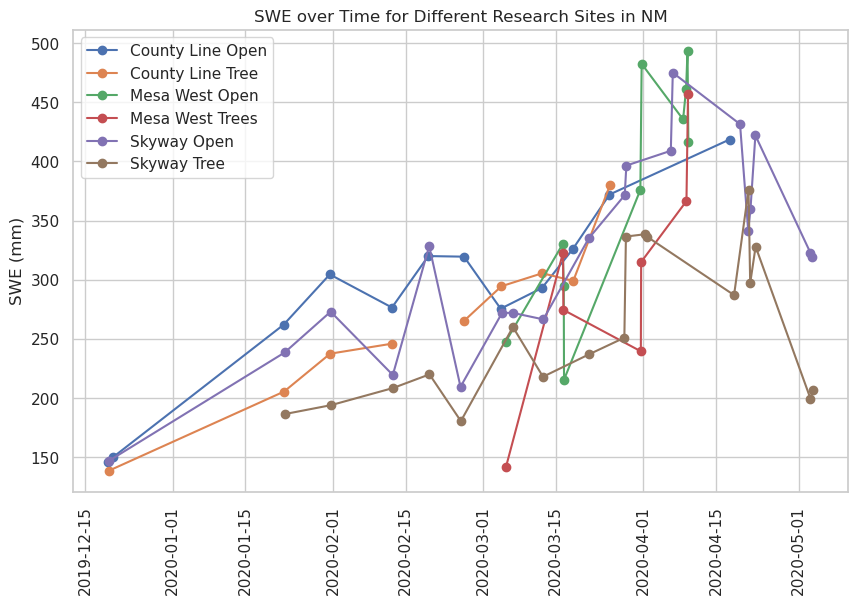

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('SP_20.csv')

# Print out the column names
print(df.head())

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV file
df = pd.read_csv('SP_20.csv', skiprows=32)

# Ignore the first 31 rows
df = df.drop(axis=0, index=0)

# Convert the 'time' column to datetime format with the specified format
df['Date/Local Standard Time'] = pd.to_datetime(df['Date/Local Standard Time'], format='%Y-%m-%dT%H:%M', errors='coerce')

# Replace -9999 with NaN in the 'SWE' column
df['SWE (mm)'] = df['SWE (mm)'].replace(-9999, np.nan)

# Set plot style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot data for each site separately
for site in df['Site'].unique():
    subset = df[df['Site'] == site]
    plt.plot(subset['Date/Local Standard Time'], subset['SWE (mm)'], marker='o', label=site)

# Add labels and title
plt.xticks(rotation=90)
#plt.xlabel('Time')
plt.ylabel('SWE (mm)')
plt.title('SWE over Time for Different Research Sites in NM')
plt.legend()

# Display the plot
plt.show()